In [ ]:
import pandas as pd
import numpy as np
import pickle
import joblib

# Libraries for modeling & evaluation
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# 02 Prabowo

In [ ]:
df_prabowo = pd.read_excel('Data Labelling Prabowo_2.xlsx')
df_prabowo

,Clean,Tokenized 2,Polarity Score,polarity
0,rabu desember selesai acara rapat konsolidasi ...,"['rabu', 'desember', 'selesai', 'acara', 'rapa...",-6,Negatif
1,tema debat rujuk visi nasional cantum buka uud...,"['tema', 'debat', 'rujuk', 'visi', 'nasional',...",10,Positif
2,debat tanggal februari tema teknologi informas...,"['debat', 'tanggal', 'februari', 'tema', 'tekn...",2,Positif
3,tema debat empat tanggal januari perihal energ...,"['tema', 'debat', 'empat', 'tanggal', 'januari...",-2,Negatif
4,tema debat tiga tanggal januari ekonomi rakyat...,"['tema', 'debat', 'tiga', 'tanggal', 'januari'...",0,Positif
...,...,...,...,...
1756,prabowogibran dukung ratus mantan kades cirebo...,"['prabowogibran', 'dukung', 'ratus', 'mantan',...",0,Positif
1757,solidaritas positif mantan kepala desa cirebon...,"['solidaritas', 'positif', 'mantan', 'kepala',...",-1,Negatif
1758,mantan kepala desa dukung positif prabowogibra...,"['mantan', 'kepala', 'desa', 'dukung', 'positi...",5,Positif
1759,suara hati mantan kades kumpul prabowogibran s...,"['suara', 'hati', 'mantan', 'kades', 'kumpul',...",1,Positif


In [ ]:
df_prabowo = df_prabowo[0:1607]

In [ ]:
df_prabowo

,Clean,Tokenized 2,Polarity Score,polarity
0,rabu desember selesai acara rapat konsolidasi ...,"['rabu', 'desember', 'selesai', 'acara', 'rapa...",-6,Negatif
1,tema debat rujuk visi nasional cantum buka uud...,"['tema', 'debat', 'rujuk', 'visi', 'nasional',...",10,Positif
2,debat tanggal februari tema teknologi informas...,"['debat', 'tanggal', 'februari', 'tema', 'tekn...",2,Positif
3,tema debat empat tanggal januari perihal energ...,"['tema', 'debat', 'empat', 'tanggal', 'januari...",-2,Negatif
4,tema debat tiga tanggal januari ekonomi rakyat...,"['tema', 'debat', 'tiga', 'tanggal', 'januari'...",0,Positif
...,...,...,...,...
1602,dukung panik nyata drama klaim klaim panik,"['dukung', 'panik', 'nyata', 'drama', 'klaim',...",-6,Negatif
1603,pimpin teladan pimpin faham agama dorong masya...,"['pimpin', 'teladan', 'pimpin', 'faham', 'agam...",0,Positif
1604,dukung panik nyata drama klaim klaim panik,"['dukung', 'panik', 'nyata', 'drama', 'klaim',...",-6,Negatif
1605,dukung prabowo gibran sejuk narasi sengaja han...,"['dukung', 'prabowo', 'gibran', 'sejuk', 'nara...",-2,Negatif


In [ ]:
X = df_prabowo['Clean']
y = df_prabowo['polarity']

In [ ]:
X

0       rabu desember selesai acara rapat konsolidasi ...
1       tema debat rujuk visi nasional cantum buka uud...
2       debat tanggal februari tema teknologi informas...
3       tema debat empat tanggal januari perihal energ...
4       tema debat tiga tanggal januari ekonomi rakyat...
                              ...                        
1602           dukung panik nyata drama klaim klaim panik
1603    pimpin teladan pimpin faham agama dorong masya...
1604           dukung panik nyata drama klaim klaim panik
1605    dukung prabowo gibran sejuk narasi sengaja han...
1606    dukung mantan kades cirebon prabowogibran cerm...
Name: Clean, Length: 1607, dtype: object

In [ ]:
df_prabowo['Clean'] = df_prabowo['Clean'].fillna('')  # Fill NaN values with an empty string

<ipython-input-86-e9aa2b607fa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prabowo['Clean'] = df_prabowo['Clean'].fillna('')  # Fill NaN values with an empty string


In [ ]:
# Jika X mengandung np.nan, gantikan dengan string kosong
X = X.fillna("")

In [ ]:
X

0       rabu desember selesai acara rapat konsolidasi ...
1       tema debat rujuk visi nasional cantum buka uud...
2       debat tanggal februari tema teknologi informas...
3       tema debat empat tanggal januari perihal energ...
4       tema debat tiga tanggal januari ekonomi rakyat...
                              ...                        
1602           dukung panik nyata drama klaim klaim panik
1603    pimpin teladan pimpin faham agama dorong masya...
1604           dukung panik nyata drama klaim klaim panik
1605    dukung prabowo gibran sejuk narasi sengaja han...
1606    dukung mantan kades cirebon prabowogibran cerm...
Name: Clean, Length: 1607, dtype: object

In [ ]:
y

0       Negatif
1       Positif
2       Positif
3       Negatif
4       Positif
         ...   
1602    Negatif
1603    Positif
1604    Negatif
1605    Negatif
1606    Positif
Name: polarity, Length: 1607, dtype: object

In [ ]:
y.value_counts()

polarity
Positif    867
Negatif    740
Name: count, dtype: int64

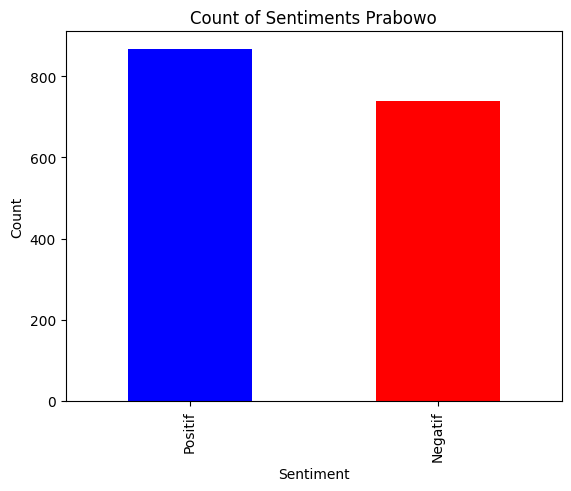

In [ ]:
import matplotlib.pyplot as plt

# Contoh data
data = y.value_counts()

# Membuat diagram batang
data.plot(kind='bar', color=['blue','red'])

# Menambahkan judul dan label
plt.title('Count of Sentiments Prabowo')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Menampilkan diagram batang
plt.show()

# Feature Extraction (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
response = tf_idf.fit_transform(X)
print(response)

  (0, 669)	0.24408813565725498
  (0, 1732)	0.2973264936194108
  (0, 1559)	0.2506390389638956
  (0, 697)	0.25838711306004497
  (0, 979)	0.23340808856906323
  (0, 1560)	0.19640071127430123
  (0, 1163)	0.2973264936194108
  (0, 74)	0.267869989358728
  (0, 1680)	0.262864592829746
  (0, 807)	0.2543367399268461
  (0, 1304)	0.2506390389638956
  (0, 6)	0.23841348509804525
  (0, 1410)	0.2973264936194108
  (0, 365)	0.22118253470321284
  (0, 1287)	0.2800955432245784
  (1, 1504)	0.1450183681568409
  (1, 1239)	0.11924147325270662
  (1, 1345)	0.28680518324548715
  (1, 662)	0.28680518324548715
  (1, 145)	0.2184538124341051
  (1, 1320)	0.27226542536403286
  (1, 1092)	0.28680518324548715
  (1, 1696)	0.28680518324548715
  (1, 244)	0.26979951858029033
  (1, 266)	0.28680518324548715
  :	:
  (1604, 402)	0.3103600994972106
  (1604, 1109)	0.3093381660872996
  (1604, 1159)	0.6207201989944212
  (1604, 407)	0.20598969356577387
  (1605, 540)	0.38393397987964295
  (1605, 1045)	0.36168386929694846
  (1605, 1400)	0.

In [ ]:
#melihat jumlah fitur

print(len(tf_idf.get_feature_names_out()))

1747


In [ ]:
#melihat fitur-fitur apa saja yang ada di dalam corpus

tf_idf.get_feature_names_out()

array(['aamiin', 'abadi', 'abai', ..., 'yogya', 'your', 'ziarah'],
      dtype=object)

In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aamiin,abadi,abai,abang,abdi,abdullah,acara,aceh,ada,adat,...,yabukannya,yahnyatanya,yak,yakin,yap,yf,ykan,yogya,your,ziarah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.238413,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.252402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature_pickle_prabowo.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

# Chi Square

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
y

array(['Negatif', 'Positif', 'Positif', ..., 'Negatif', 'Negatif',
       'Positif'], dtype=object)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Tentukan nilai taraf nyata (𝛼)
alpha = 0.1

# Hitung nilai chi-square dan p-value untuk setiap fitur
chi2_values, p_values = chi2(X_tf_idf, y)

# Pilih fitur dengan nilai p-value kurang dari sama dengan nilai taraf (alpha) 0.5
selected_feature_indices = np.where(p_values <= alpha)[0]

#Membuat dataframe fitur terpilih dengan p-value <= 0.5 (FITUR TERPILIH)
feature_names = tf_idf.get_feature_names_out()
selected_df = pd.DataFrame({'Fitur': feature_names[selected_feature_indices],
                            'Chi-Square': chi2_values[selected_feature_indices],
                            'P-Value': p_values[selected_feature_indices]})
selected_df = selected_df.sort_values(by='P-Value')
selected_df

#Menampilkan Dataframe dengan 1212 fitur yang memiliki p-value <= 0.5
selected_df

,Fitur,Chi-Square,P-Value
83,panik,140.359097,2.221715e-32
63,klaim,140.199855,2.407190e-32
38,drama,70.179548,5.414489e-17
82,nyata,69.834988,6.447894e-17
127,tim,17.295939,3.198698e-05
...,...,...,...
87,pecat,2.737021,9.804737e-02
119,sukses,2.733460,9.826616e-02
105,rujuk,2.721571,9.900055e-02
3,allah,2.717141,9.927569e-02


In [ ]:
# Pilih fitur dengan nilai p-value lebih dari sama dengan nilai taraf (alpha) 0.3 (FITUR TERBUANG)
nonselected_feature_indices = np.where(p_values > alpha)[0]
nonselected_df = pd.DataFrame({'Fitur': feature_names[nonselected_feature_indices],
                               'ChiSquare': chi2_values[nonselected_feature_indices],
                               'PValue': p_values[nonselected_feature_indices]})
nonselected_df = nonselected_df.sort_values(by='PValue')
nonselected_df

,Fitur,ChiSquare,PValue
1217,rencana,2.704391e+00,0.100072
177,berita,2.700179e+00,0.100337
589,isu,2.680958e+00,0.101555
375,ekonomi,2.677279e+00,0.101790
414,format,2.655919e+00,0.103165
...,...,...,...
1478,terima,8.942348e-05,0.992455
1028,nyerang,7.561411e-05,0.993062
877,mau,5.553720e-05,0.994054
915,milu,2.466166e-06,0.998747


In [ ]:
# Menyimpan DataFrame dengan fitur yang memiliki p-value <= 0.3
with open('selected_features_df_pickle_prabowo.pickle', 'wb') as output:
    pickle.dump(selected_df, output)

# Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC                           # Import SVM dari scikit-learn
from sklearn.model_selection import train_test_split  # Import fungsi untuk membagi data
from sklearn.metrics import accuracy_score             # Import metrik evaluasi
from joblib import dump

In [ ]:
# Mengambil hanya fitur yang terpilih
selected_features = selected_df['Fitur'].values

In [ ]:
# Mengambil hanya fitur yang terpilih yang ada dalam data_tf_idf
X_selected = data_tf_idf[selected_features].values

In [ ]:
print(selected_features)

['panik' 'klaim' 'drama' 'nyata' 'tim' 'tulus' 'positif' 'tentu'
 'prabowogibran' 'usul' 'tani' 'purnakuwu' 'dukungpragibs' 'dalam'
 'dokumen' 'visimisi' 'cermin' 'cirebon' 'caprescawapres' 'desember'
 'papar' 'pilih' 'langkah' 'fgd' 'ubah' 'internasional' 'amin' 'desa'
 'adil' 'indonesia' 'perihal' 'sehat' 'diplomasi' 'andai' 'solusi' 'wujud'
 'makmur' 'berani' 'pasang' 'teks' 'mantan' 'tkn' 'pimpin' 'rembang'
 'satu' 'kait' 'semangat' 'visi' 'digital' 'nomor' 'capai' 'sepakat'
 'tegas' 'hubung' 'imin' 'ratus' 'sekretaris' 'penuh' 'geopolitik'
 'contoh' 'korupsi' 'lingkung' 'sumber' 'dedikasi' 'bulat'
 'baswedanmuhaimin' 'baik' 'kelompok' 'kantor' 'naik' 'ikut' 'yakin'
 'layan' 'mari' 'wahid' 'november' 'kpu' 'hadap' 'anggap' 'sesuai'
 'kampanye' 'mantap' 'senin' 'kepala' 'wafiroh' 'nihayatul' 'uud' 'rpjpn'
 'cantum' 'jangka' 'nri' 'buka' 'milih' 'catat' 'presidenwakil' 'minggu'
 'presiden' 'raya' 'hidup' 'sda' 'smn' 'agraria' 'adat' 'karbon' 'empat'
 'kades' 'dagang' 'berantas' 'cak'

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tentukan parameter grid
parameters = [
    {'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100, 1000]}
]

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi objek GridSearchCV dengan penambahan parameter scoring='accuracy'
grid_search = GridSearchCV(svm_model, parameters, scoring='accuracy', verbose=3)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   0.7s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   0.6s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   0.6s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.533 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.536 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.538 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.538 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.538 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.533 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.536 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [ ]:
best_params = {}
for kernel in ['rbf', 'linear', 'poly']:
    best_params[kernel] = grid_search.cv_results_['params'][np.where(grid_search.cv_results_['param_kernel'] == kernel)[0][grid_search.cv_results_['rank_test_score'][grid_search.cv_results_['param_kernel'] == kernel].argmin()]]

for kernel, params in best_params.items():
    print(f"Best parameters for '{kernel}' kernel:", params)

Best parameters for 'rbf' kernel: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best parameters for 'linear' kernel: {'C': 100, 'kernel': 'linear'}
Best parameters for 'poly' kernel: {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [ ]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# model_svm = SVC(C=40, kernel='linear')
# model_svm = SVC(C=40, degree=1, kernel='poly')
model_svm = SVC(C=1000, gamma=0.1, kernel='rbf')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.7556935817805382


In [ ]:
model_pred = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array(['Positif', 'Positif', 'Positif', 'Positif', 'Negatif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Negatif', 'Negatif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif',
       'Negatif', 'Negatif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Positif', 'Negatif', 'Positif', 'Positif', 'Negatif', 'Negatif',
       'Negatif', 'Positif', 'Positif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Negatif', 

In [ ]:
model_svm

SVC(C=1000, gamma=0.1)

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array(['Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif',
       'Positif', 'Negatif', 'Positif', 'Positif', 'Negatif', 'Negatif',
       'Positif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Positif', 'Negatif',
       'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif', 'Positif',
       'Negatif', 'Negatif', 'Positif', 'Negatif', 'Positif', 'Positif',
       'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Positif', 'Positif', 'Negatif',
       'Positif', 'Positif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
       'Negatif', 'Positif', 'Positif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Positif', 'Positif', 'Positif',
       'Negatif', 'Positif', 'Positif', 'Negatif', 'Negatif', 'Positif',
       'Positif', 'Positif', 'Positif', 'Negatif', 

In [ ]:
# Jumlah total dataset
total_data_train = len(y_train)
total_data_test = len(y_test)

print("Jumlah Total Dataset (Data Latih):", total_data_train)
print("Jumlah Total Dataset (Data Uji):", total_data_test)

# Jumlah data positif dan negatif dari data latih
print("\nData Latih:")
print("Jumlah Data Positif:", y_train[y_train == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_train[y_train == 'Negatif'].shape[0])

# Jumlah data positif dan negatif dari data uji
print("\nData Uji:")
print("Jumlah Data Positif:", y_test[y_test == 'Positif'].shape[0])
print("Jumlah Data Negatif:", y_test[y_test == 'Negatif'].shape[0])

Jumlah Total Dataset (Data Latih): 1124
Jumlah Total Dataset (Data Uji): 483

Data Latih:
Jumlah Data Positif: 603
Jumlah Data Negatif: 521

Data Uji:
Jumlah Data Positif: 264
Jumlah Data Negatif: 219


# Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 365
Jumlah prediksi salah	: 118
Akurasi pengujian	: 75.56935817805382 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[117 102]
 [ 16 248]]


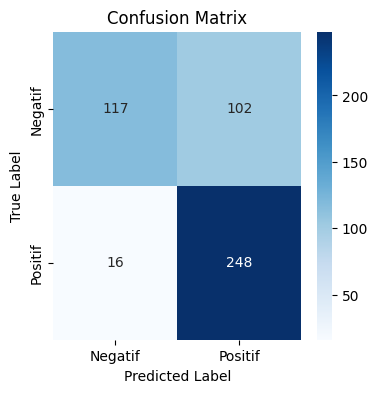

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, model_pred)

# Membuat label untuk sumbu x dan y
labels = ["Negatif", "Positif"]

# Visualisasi confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

     Negatif       0.86      0.66      0.74       219
     Positif       0.76      0.91      0.83       264

    accuracy                           0.80       483
   macro avg       0.81      0.78      0.79       483
weighted avg       0.81      0.80      0.79       483



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Mendapatkan laporan klasifikasi dalam bentuk kamus
report_dict = classification_report(y_test, model_pred, output_dict=True)

# Membuat DataFrame dari kamus laporan klasifikasi
df_report = pd.DataFrame(report_dict)

# Menampilkan DataFrame
df_report

,Negatif,Positif,accuracy,macro avg,weighted avg
precision,0.857143,0.761905,0.795031,0.809524,0.805087
recall,0.657534,0.909091,0.795031,0.783313,0.795031
f1-score,0.744186,0.829016,0.795031,0.786601,0.790552
support,219.000000,264.000000,0.795031,483.000000,483.000000


In [ ]:
selected_df['Fitur'].to_csv("hasil_prabowo.csv")

In [ ]:
selected_df['Fitur']

404      panik
287      klaim
144      drama
394      nyata
582        tim
        ...   
32      arogan
520       sepi
405     pantat
573    tendang
493    sambung
Name: Fitur, Length: 635, dtype: object

In [ ]:
data.to_csv("hasil_prabowo.csv")

# Export Model

In [ ]:
joblib.dump(model, 'svm_prabowo_akhir1.pkl')

['svm_prabowo_akhir1.pkl']

In [ ]:
joblib.dump(tf_idf, 'tfidf_prabowo_akhir.pkl')


['tfidf_prabowo_akhir.pkl']